# Preprocessing - Transformation & Scaling
In this notebook we want to explore methods for transformations and scaling (ie standardization).

- Score: Version 2 and 3 may need to be transformed to approximate normal distribution
- Features & Score: scale to same mean/variance: standardization
- Features: Prepare data according to its datatype

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"
plot_path = "plots/"

In [3]:
table2 = pd.read_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final.csv", sep=";")

In [4]:
# As an example we use versandhandel V3
domain = "Versandhandel"
version = 3

df_data = table2[(table2["domain"]==domain) & (table2["version"]==version)]

## Score: Approximate normal distribution

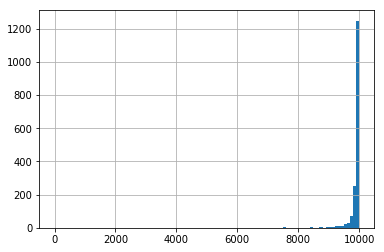

In [5]:
score = df_data["score"]
score.hist(bins=100)

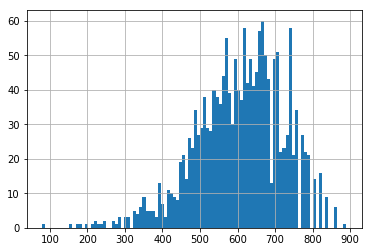

In [6]:
score_normal = score.apply(lambda x: 1000-np.log(10000-x)*100)
score_normal.hist(bins=100)

## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
score_scaled = scaler.fit_transform(score_normal.values.reshape(-1,1))

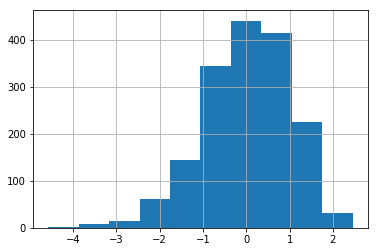

In [10]:
pd.Series(score_scaled.T[0]).hist()

In [11]:
X = scaler.fit_transform(df_data[["numberOfCreditCards", "numberOfGiroAccounts"]])
np.nanvar(X[:,0]), np.nanmean(X[:,0])

(1.0000000000000002, 8.240223907091951e-17)

## Datatype preparation

In [12]:
def prepare_type(df_data):
    # Nominal features
    df_data["sex"] = df_data["sex"].astype("category")
    df_data["familyStatus"] = df_data["familyStatus"].astype("category")
    df_data["employment"] = df_data["employment"].astype("category")
    df_data["housing"] = df_data["housing"].astype("category")
    df_data["east_west"] = df_data["east_west"].astype("category")

    # Ordinal features
    cat_ordtype = pd.api.types.CategoricalDtype(categories=[500, 1000, 2000, 3000, 4000, 5000], ordered=True)

    df_data["monthlyIncome"] = df_data["monthlyIncome"].astype(cat_ordtype)
    df_data["activeLoanAmount"] = df_data["activeLoanAmount"].astype(cat_ordtype)
    df_data["paidOffLoanAmount"] = df_data["paidOffLoanAmount"].astype(cat_ordtype)
    
    return df_data

In [13]:
df_data = prepare_type(df_data)
df_data["east_west"].dtype

/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/phil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

CategoricalDtype(categories=['east', 'west'], ordered=False)